**IMPORTS AND LOADING THE DATA**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

2024-03-09 23:56:24.849637: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-09 23:56:24.849685: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-09 23:56:24.851396: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-09 23:56:24.861325: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-09 23:56:26.074768: W tensorflow/compiler/tf2

In [2]:
df = pd.read_csv('TSLA.csv').drop(['Adj Close'],axis = 1)
df

,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900
...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,15719300


In [3]:
df['Day'] = pd.to_datetime(df['Date']).dt.day
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.year

In [4]:
df.drop(['Date'],axis=1,inplace=True)

In [5]:
df

,Open,High,Low,Close,Volume,Day,Month,Year
0,19.000000,25.000000,17.540001,23.889999,18766300,29,6,2010
1,25.790001,30.420000,23.299999,23.830000,17187100,30,6,2010
2,25.000000,25.920000,20.270000,21.959999,8218800,1,7,2010
3,23.000000,23.100000,18.709999,19.200001,5139800,2,7,2010
4,20.000000,20.000000,15.830000,16.110001,6866900,6,7,2010
...,...,...,...,...,...,...,...,...
2411,568.489990,576.809998,558.080017,566.900024,11788500,28,1,2020
2412,575.690002,589.799988,567.429993,580.989990,17801500,29,1,2020
2413,632.419983,650.880005,618.000000,640.809998,29005700,30,1,2020
2414,640.000000,653.000000,632.520020,650.570007,15719300,31,1,2020


In [6]:
df.describe()

,Open,High,Low,Close,Volume,Day,Month,Year
count,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03,2416.000000,2416.000000,2416.000000
mean,186.271147,189.578224,182.916639,186.403651,5.572722e+06,15.748344,6.645281,2014.776904
std,118.740163,120.892329,116.857591,119.136020,4.987809e+06,8.757534,3.445464,2.787784
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,1.000000,1.000000,2010.000000
25%,34.342498,34.897501,33.587501,34.400002,1.899275e+06,8.000000,4.000000,2012.000000
50%,213.035004,216.745002,208.870002,212.960007,4.578400e+06,16.000000,7.000000,2015.000000
75%,266.450012,270.927513,262.102501,266.774994,7.361150e+06,23.000000,10.000000,2017.000000
max,673.690002,786.140015,673.520020,780.000000,4.706500e+07,31.000000,12.000000,2020.000000


**DATA PREPROCESSING AND EDA**

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()
scaler.fit(df)

MinMaxScaler()

In [9]:
df = scaler.transform(df)

In [10]:
df = pd.DataFrame(df, columns=['Open', 'High', 'Low', 'Close', 'Volume', 'Day', 'Month', 'Year'])
df

,Open,High,Low,Close,Volume,Day,Month,Year
0,0.004349,0.010877,0.003887,0.010586,0.397214,0.933333,0.454545,0.0
1,0.014676,0.017920,0.012634,0.010508,0.363576,0.966667,0.454545,0.0
2,0.013474,0.012073,0.008033,0.008061,0.172543,0.000000,0.545455,0.0
3,0.010433,0.008408,0.005664,0.004449,0.106958,0.033333,0.545455,0.0
4,0.005870,0.004379,0.001291,0.000406,0.143747,0.166667,0.545455,0.0
...,...,...,...,...,...,...,...,...
2411,0.840012,0.727970,0.824703,0.721146,0.248581,0.900000,0.000000,1.0
2412,0.850962,0.744851,0.838901,0.739584,0.376663,0.933333,0.000000,1.0
2413,0.937237,0.824226,0.915692,0.817862,0.615322,0.966667,0.000000,1.0
2414,0.948764,0.826981,0.937741,0.830633,0.332310,1.000000,0.000000,1.0


In [11]:
train_df = df[df.Year < 0.7]
train_df

,Open,High,Low,Close,Volume,Day,Month,Year
0,0.004349,0.010877,0.003887,0.010586,0.397214,0.933333,0.454545,0.0
1,0.014676,0.017920,0.012634,0.010508,0.363576,0.966667,0.454545,0.0
2,0.013474,0.012073,0.008033,0.008061,0.172543,0.000000,0.545455,0.0
3,0.010433,0.008408,0.005664,0.004449,0.106958,0.033333,0.545455,0.0
4,0.005870,0.004379,0.001291,0.000406,0.143747,0.166667,0.545455,0.0
...,...,...,...,...,...,...,...,...
1635,0.291780,0.255773,0.292663,0.258493,0.096961,0.733333,1.000000,0.6
1636,0.302243,0.267209,0.302852,0.266593,0.123485,0.866667,1.000000,0.6
1637,0.312356,0.269223,0.307073,0.266867,0.078046,0.900000,1.000000,0.6
1638,0.307840,0.263245,0.302396,0.260246,0.083638,0.933333,1.000000,0.6


In [12]:
test_df = df[df.Year >= 0.7]
test_df

,Open,High,Low,Close,Volume,Day,Month,Year
1640,0.302213,0.264714,0.297598,0.263269,0.123647,0.066667,0.000000,0.7
1641,0.302045,0.274681,0.302685,0.276354,0.236333,0.100000,0.000000,0.7
1642,0.319793,0.274006,0.314286,0.276040,0.123400,0.133333,0.000000,0.7
1643,0.320569,0.277683,0.319601,0.278998,0.115225,0.166667,0.000000,0.7
1644,0.323671,0.279775,0.323473,0.281968,0.082243,0.266667,0.000000,0.7
...,...,...,...,...,...,...,...,...
2411,0.840012,0.727970,0.824703,0.721146,0.248581,0.900000,0.000000,1.0
2412,0.850962,0.744851,0.838901,0.739584,0.376663,0.933333,0.000000,1.0
2413,0.937237,0.824226,0.915692,0.817862,0.615322,0.966667,0.000000,1.0
2414,0.948764,0.826981,0.937741,0.830633,0.332310,1.000000,0.000000,1.0


array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Day'}>],
       [<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Year'}>, <Axes: >]], dtype=object)

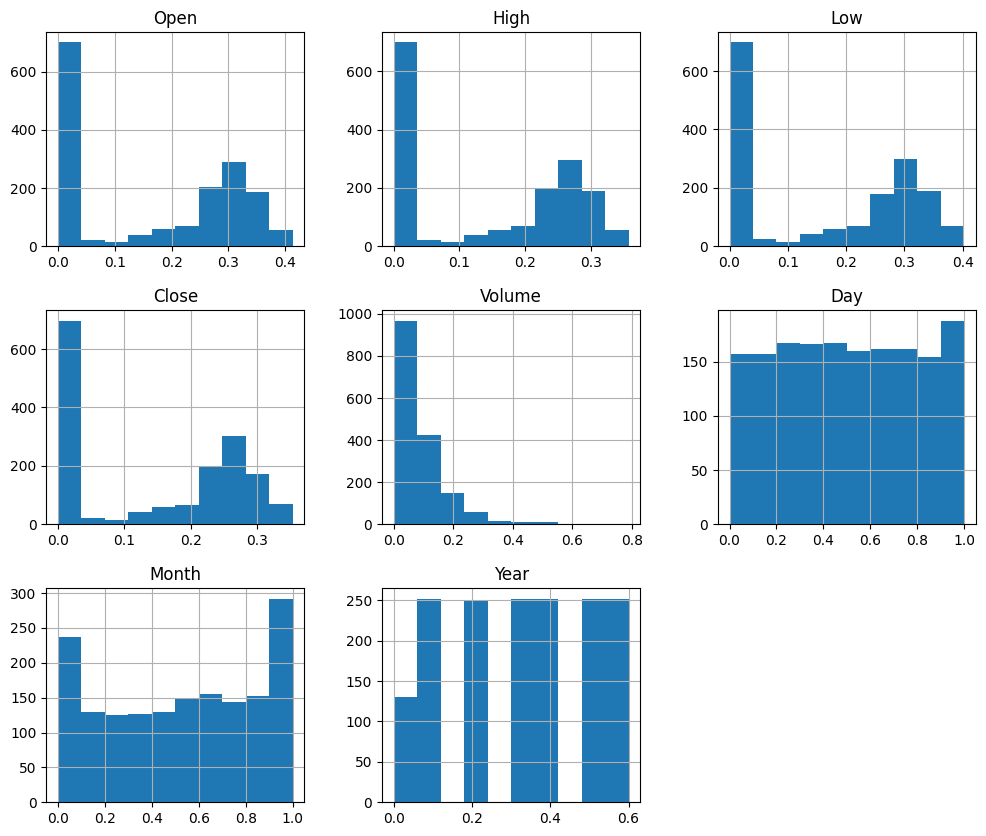

In [13]:
train_df.hist(figsize=(12,10))

<Axes: >

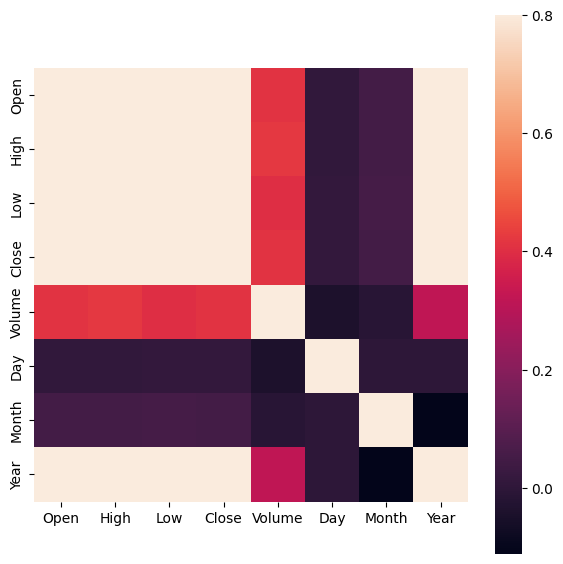

In [14]:
c_mat = train_df.corr()
plt.figure(figsize= (7,7))
sns.heatmap(c_mat, vmax=0.8, square=True)

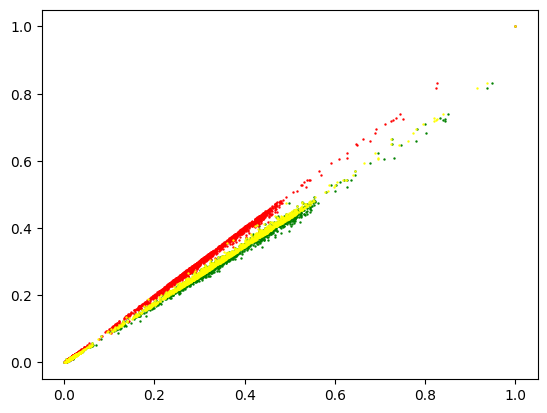

In [15]:
plt.scatter(df.Open, df.Close, s=0.5, c=['green'])
plt.scatter(df.High, df.Close, s=0.5, c=['red'])
plt.scatter(df.Low, df.Close, s=0.5, c=['yellow'])

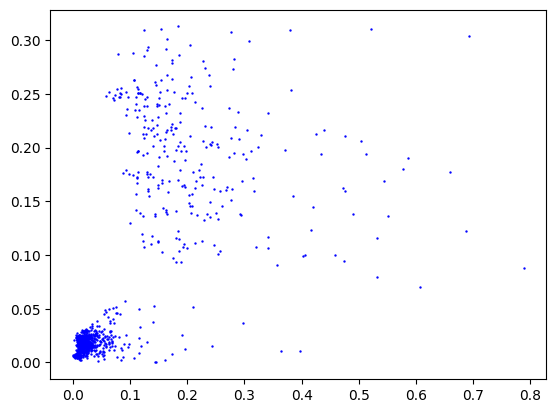

In [16]:
plt.scatter(df.Volume.head(1000), df.Close.head(1000), s=0.5, c=['blue'])

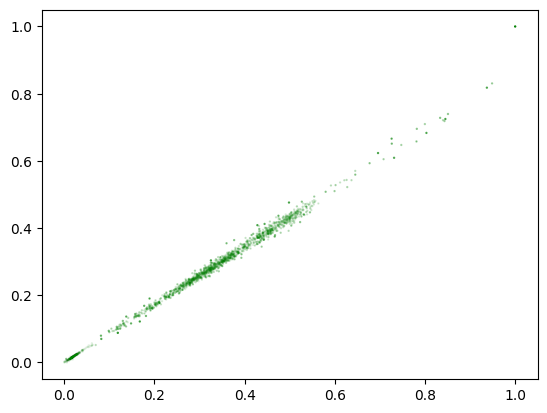

In [17]:
plt.scatter(df.Open, df.Close, s=0.5, c=['green'], alpha=(df.Volume/df.Volume.sum()*280))

In [18]:
X_train = train_df[['Open', 'High', 'Low', 'Volume', 'Day', 'Month', 'Year']]
X_test = test_df[['Open', 'High', 'Low', 'Volume', 'Day', 'Month', 'Year']]

y_train = train_df[['Close']]
y_test = test_df[['Close']]

In [19]:
X_train

,Open,High,Low,Volume,Day,Month,Year
0,0.004349,0.010877,0.003887,0.397214,0.933333,0.454545,0.0
1,0.014676,0.017920,0.012634,0.363576,0.966667,0.454545,0.0
2,0.013474,0.012073,0.008033,0.172543,0.000000,0.545455,0.0
3,0.010433,0.008408,0.005664,0.106958,0.033333,0.545455,0.0
4,0.005870,0.004379,0.001291,0.143747,0.166667,0.545455,0.0
...,...,...,...,...,...,...,...
1635,0.291780,0.255773,0.292663,0.096961,0.733333,1.000000,0.6
1636,0.302243,0.267209,0.302852,0.123485,0.866667,1.000000,0.6
1637,0.312356,0.269223,0.307073,0.078046,0.900000,1.000000,0.6
1638,0.307840,0.263245,0.302396,0.083638,0.933333,1.000000,0.6


In [20]:
X_train.isna().sum()

Open      0
High      0
Low       0
Volume    0
Day       0
Month     0
Year      0
dtype: int64

In [21]:
X_test.isna().sum()

Open      0
High      0
Low       0
Volume    0
Day       0
Month     0
Year      0
dtype: int64

**BUILDING AND TRAINING THE MODEL**

In [22]:
from keras.models import Sequential

In [23]:
model = Sequential([
    keras.layers.Dense(256,input_dim = X_train.shape[1]),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse')

2024-03-09 23:56:30.706092: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [24]:
model.fit(X_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
52/52 [==============================] - 3s 40ms/step - loss: 0.0103
Epoch 2/20
52/52 [==============================] - 2s 40ms/step - loss: 2.4069e-05
Epoch 3/20
52/52 [==============================] - 2s 39ms/step - loss: 2.2718e-05
Epoch 4/20
52/52 [==============================] - 2s 39ms/step - loss: 1.5327e-05
Epoch 5/20
52/52 [==============================] - 2s 40ms/step - loss: 1.5887e-05
Epoch 6/20
52/52 [==============================] - 2s 41ms/step - loss: 1.8465e-05
Epoch 7/20
52/52 [==============================] - 2s 42ms/step - loss: 2.0296e-05
Epoch 8/20
52/52 [==============================] - 2s 39ms/step - loss: 2.2267e-05
Epoch 9/20
52/52 [==============================] - 2s 39ms/step - loss: 2.1446e-05
Epoch 10/20
52/52 [==============================] - 2s 40ms/step - loss: 2.8268e-05
Epoch 11/20
52/52 [==============================] - 2s 39ms/step - loss: 2.1827e-05
Epoch 12/20
52/52 [==============================] - 2s 39ms/step - loss: 1.92

**EVALUATING THE MODEL**

In [25]:
model.evaluate(X_test, y_test, verbose=1)

25/25 [==============================] - 0s 6ms/step - loss: 6.1691e-05


6.169080006657168e-05

In [26]:
preds = model.predict(X_test)
preds[0:5], preds[771:776]

25/25 [==============================] - 0s 6ms/step


(array([[0.26020476],
        [0.26565632],
        [0.27183384],
        [0.27464083],
        [0.27590317]], dtype=float32),
 array([[0.71363765],
        [0.72745943],
        [0.80461305],
        [0.80933946],
        [0.9331625 ]], dtype=float32))

In [27]:
y_test.reset_index().drop(['index'],axis=1)

,Close
0,0.263269
1,0.276354
2,0.276040
3,0.278998
4,0.281968
...,...
771,0.721146
772,0.739584
773,0.817862
774,0.830633


**The loss is just 6.17e-05, which is pretty impressive considering the volatile nature of the dataset. We can also see that the predictions are quite accurate.**